# **Ensayo de lectura del Bus CAN en KIA Sportage 2015**

---


El ensayo se realizó el 23 de julio de 2021 en el dinamómetro del Laboratorio de Emisiones de *Blanco y Negro Masivo (Metrocali)* en el Patio Taller Calima ubicado en Yumbo, Valle.



---


El ensayo se realizó con el dispositivo [CANEdge2 Logger](https://www.csselectronics.com/screen/product/can-lin-logger-wifi-canedge2/language/en). En el siguiente enlace puede encontrar la carpeta con la data generada.

*   [KIA Sportage 2015 - Dina. Metrocali](https://drive.google.com/drive/folders/1_JDW8dhGknh96i0ICReeCrxRWxyb0GPR?usp=sharing)

A continuación una foto del ensayo.

![](https://drive.google.com/uc?export=view&id=1jKCOCNwXc4dlgO-PudePOD4P0t-uRDw3)

In [690]:
import pandas as pd
# https://drive.google.com/file/d/1QcO_DUKsjT9P8xkiv5-95VnBavs_-rqC/view?usp=sharing
data = pd.read_csv('https://drive.google.com/uc?id=1QcO_DUKsjT9P8xkiv5-95VnBavs_-rqC',
                           delimiter=';')
data.head()

,TimestampEpoch,BusChannel,ID,IDE,DLC,DataLength,Dir,EDL,BRS,DataBytes
0,1.627077e+09,1,370,0,8,8,0,0,0,FF00000000000000
1,1.627077e+09,1,316,0,8,8,0,0,0,0500000000140080
2,1.627077e+09,1,260,0,8,8,0,0,0,1B00000000FF0000
3,1.627077e+09,1,2A0,0,8,8,0,0,0,00009600D7330000
4,1.627077e+09,1,545,0,8,8,0,0,0,9A00007B00000000


In [691]:
data.index

RangeIndex(start=0, stop=1137089, step=1)

Como se puede cobservar, del ensayo se obtuvieron 1.137.089 datos mensajes CAN.

In [692]:
data.columns

Index(['TimestampEpoch', 'BusChannel', 'ID', 'IDE', 'DLC', 'DataLength', 'Dir',
       'EDL', 'BRS', 'DataBytes'],
      dtype='object')

In [693]:
data.info

<bound method DataFrame.info of          TimestampEpoch  BusChannel   ID  IDE  DLC  DataLength  Dir  EDL  BRS  \
0          1.627077e+09           1  370    0    8           8    0    0    0   
1          1.627077e+09           1  316    0    8           8    0    0    0   
2          1.627077e+09           1  260    0    8           8    0    0    0   
3          1.627077e+09           1  2A0    0    8           8    0    0    0   
4          1.627077e+09           1  545    0    8           8    0    0    0   
...                 ...         ...  ...  ...  ...         ...  ...  ...  ...   
1137084    1.627078e+09           1  316    0    8           8    0    0    0   
1137085    1.627078e+09           1  260    0    8           8    0    0    0   
1137086    1.627078e+09           1  2A0    0    8           8    0    0    0   
1137087    1.627078e+09           1  545    0    8           8    0    0    0   
1137088    1.627078e+09           1  329    0    8           8    0    0    0

In [694]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1137089 entries, 0 to 1137088
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   TimestampEpoch  1137089 non-null  float64
 1   BusChannel      1137089 non-null  int64  
 2   ID              1137089 non-null  object 
 3   IDE             1137089 non-null  int64  
 4   DLC             1137089 non-null  int64  
 5   DataLength      1137089 non-null  int64  
 6   Dir             1137089 non-null  int64  
 7   EDL             1137089 non-null  int64  
 8   BRS             1137089 non-null  int64  
 9   DataBytes       1137089 non-null  object 
dtypes: float64(1), int64(7), object(2)
memory usage: 86.8+ MB


In [695]:
data.size

11370890

In [696]:
data.shape

(1137089, 10)

In [697]:
data.dtypes

TimestampEpoch    float64
BusChannel          int64
ID                 object
IDE                 int64
DLC                 int64
DataLength          int64
Dir                 int64
EDL                 int64
BRS                 int64
DataBytes          object
dtype: object

In [698]:
data.head(5)

,TimestampEpoch,BusChannel,ID,IDE,DLC,DataLength,Dir,EDL,BRS,DataBytes
0,1.627077e+09,1,370,0,8,8,0,0,0,FF00000000000000
1,1.627077e+09,1,316,0,8,8,0,0,0,0500000000140080
2,1.627077e+09,1,260,0,8,8,0,0,0,1B00000000FF0000
3,1.627077e+09,1,2A0,0,8,8,0,0,0,00009600D7330000
4,1.627077e+09,1,545,0,8,8,0,0,0,9A00007B00000000


In [699]:
data.tail(5)

,TimestampEpoch,BusChannel,ID,IDE,DLC,DataLength,Dir,EDL,BRS,DataBytes
1137084,1.627078e+09,1,316,0,8,8,0,0,0,040000000011005B
1137085,1.627078e+09,1,260,0,8,8,0,0,0,1B00000000FF0000
1137086,1.627078e+09,1,2A0,0,8,8,0,0,0,0000A280D8330000
1137087,1.627078e+09,1,545,0,8,8,0,0,0,9800000200000000
1137088,1.627078e+09,1,329,0,8,8,0,0,0,40B270120020FF14


In [700]:
data.loc[10:15, 'TimestampEpoch':'DLC']

,TimestampEpoch,BusChannel,ID,IDE,DLC
10,1.627077e+09,1,260,0,8
11,1.627077e+09,1,2A0,0,8
12,1.627077e+09,1,545,0,8
13,1.627077e+09,1,329,0,8
14,1.627077e+09,1,440,0,8
15,1.627077e+09,1,43F,0,8


In [701]:
data.loc[10:15, ['TimestampEpoch', 'ID', 'DataBytes']]

,TimestampEpoch,ID,DataBytes
10,1.627077e+09,260,1B00000000FF0000
11,1.627077e+09,2A0,00009600D7330000
12,1.627077e+09,545,9A00007B00000000
13,1.627077e+09,329,40AD70120020FF14
14,1.627077e+09,440,00000004FF000000
15,1.627077e+09,43F,004040FF6A000000


In [702]:
data[['TimestampEpoch', 'ID', 'DataBytes']][10:15]

,TimestampEpoch,ID,DataBytes
10,1.627077e+09,260,1B00000000FF0000
11,1.627077e+09,2A0,00009600D7330000
12,1.627077e+09,545,9A00007B00000000
13,1.627077e+09,329,40AD70120020FF14
14,1.627077e+09,440,00000004FF000000


In [703]:
data.describe()

,TimestampEpoch,BusChannel,IDE,DLC,DataLength,Dir,EDL,BRS
count,1.137089e+06,1137089.0,1137089.0,1137089.0,1137089.0,1137089.0,1137089.0,1137089.0
mean,1.627077e+09,1.0,0.0,8.0,8.0,0.0,0.0,0.0
std,3.784282e+02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.627077e+09,1.0,0.0,8.0,8.0,0.0,0.0,0.0
25%,1.627077e+09,1.0,0.0,8.0,8.0,0.0,0.0,0.0
50%,1.627077e+09,1.0,0.0,8.0,8.0,0.0,0.0,0.0
75%,1.627078e+09,1.0,0.0,8.0,8.0,0.0,0.0,0.0
max,1.627078e+09,1.0,0.0,8.0,8.0,0.0,0.0,0.0


In [704]:
data.describe(include = ['O'])

,ID,DataBytes
count,1137089,1137089
unique,8,20555
top,440,FF02000000000000
freq,160178,137993


In [705]:
# Unique values per column excluding null
data.nunique()

TimestampEpoch    1137089
BusChannel              1
ID                      8
IDE                     1
DLC                     1
DataLength              1
Dir                     1
EDL                     1
BRS                     1
DataBytes           20555
dtype: int64

In [706]:
# Unique values per column including null
data.nunique(dropna=False)

TimestampEpoch    1137089
BusChannel              1
ID                      8
IDE                     1
DLC                     1
DataLength              1
Dir                     1
EDL                     1
BRS                     1
DataBytes           20555
dtype: int64

In [707]:
data.count()

TimestampEpoch    1137089
BusChannel        1137089
ID                1137089
IDE               1137089
DLC               1137089
DataLength        1137089
Dir               1137089
EDL               1137089
BRS               1137089
DataBytes         1137089
dtype: int64

---

In [708]:
can_bus_data = data[['TimestampEpoch', 'ID', 'DataBytes']]

In [709]:
can_bus_data = can_bus_data.rename(columns={'TimestampEpoch':'time_stamp_epoch',
                                            'ID':'can_id',
                                            'DataBytes':'data'})

In [710]:
can_bus_data.head(5)

,time_stamp_epoch,can_id,data
0,1.627077e+09,370,FF00000000000000
1,1.627077e+09,316,0500000000140080
2,1.627077e+09,260,1B00000000FF0000
3,1.627077e+09,2A0,00009600D7330000
4,1.627077e+09,545,9A00007B00000000


Convertir tiempo almacenado como UNIX epoc a formato timestamp con resolución de microsegundo.

In [711]:
# todo convert to unix epoch/timestamp to datetime format.
can_bus_data['time_stamp'] = pd.to_datetime(can_bus_data['time_stamp_epoch'],
                                   unit='s',  # s (D,s,ms,us,ns)
                                   utc=True)

Convertir de GMT/UTC 00 a GMT/UTC-5 para adecuar a horario colombiano.

In [712]:
can_bus_data['time_stamp'] = can_bus_data['time_stamp'].dt.tz_convert('America/Bogota')
can_bus_data.set_index('time_stamp', inplace=True)
can_bus_data.drop(columns=['time_stamp_epoch'], inplace=True)

In [713]:
can_bus_data['can_id'] = can_bus_data['can_id'].apply(int, base=16)

In [714]:
can_bus_data.head()

,can_id,data
time_stamp,,
2021-07-23 16:43:55.972850176-05:00,880,FF00000000000000
2021-07-23 16:43:55.973900032-05:00,790,0500000000140080
2021-07-23 16:43:55.974149888-05:00,608,1B00000000FF0000
2021-07-23 16:43:55.974400-05:00,672,00009600D7330000
2021-07-23 16:43:55.974600192-05:00,1349,9A00007B00000000


In [715]:
can = can_bus_data.copy()

In [717]:
can.head()

,can_id,data
time_stamp,,
2021-07-23 16:43:55.972850176-05:00,880,FF00000000000000
2021-07-23 16:43:55.973900032-05:00,790,0500000000140080
2021-07-23 16:43:55.974149888-05:00,608,1B00000000FF0000
2021-07-23 16:43:55.974400-05:00,672,00009600D7330000
2021-07-23 16:43:55.974600192-05:00,1349,9A00007B00000000


In [725]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

C:\Users\ENSAYO~1\AppData\Local\Temp/ipykernel_17152/265501202.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_major_formatter(ticker.FixedFormatter(tick_labels))


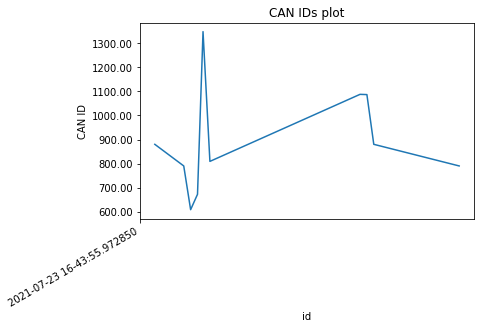

In [734]:
ax = can['can_id'][0:10].plot()
plt.title('CAN IDs plot')
plt.xlabel('id')
plt.ylabel('CAN ID')
tick_labels = can.index.strftime('%Y-%m-%d %H-%M:%S.%f')
ax.xaxis.set_major_formatter(ticker.FixedFormatter(tick_labels))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
plt.show()

In [730]:
can['can_id'].min()

608

In [731]:
can['can_id'].max()

1349